In [2]:
# 1. Loading the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the data from a CSV file
sales_data = pd.read_csv('./content/sales2.csv')

print(sales_data)

          Date Region  Sales  Profit
0   2021-01-01  North   1200     100
1   2021-01-05   West   2000     400
2   2021-01-08   East   3000     500
3   2021-02-01  North   1500     120
4   2021-02-05   West   2500     350
..         ...    ...    ...     ...
67  2022-11-05   West   3000     450
68  2022-11-08   East   4500     900
69  2022-11-01  North   2200     300
70  2022-12-05   West   3400     550
71  2022-12-08   East   5200    1100

[72 rows x 4 columns]


In [3]:
# 2. Data cleaning and pre-processing:
# Handling missing values
sales_data = sales_data.dropna()

# Dealing with outliers
sales_data = sales_data[(sales_data['Sales'] > 0) & (sales_data['Sales'] < 5000)]

# Transforming the data
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month

# sales_data['new_date'] = sales_data['Date'] + '/' sales_data['Month'] + '/' + sales_data['Year']

print(sales_data)
# print(sales_data['new_date'])


         Date Region  Sales  Profit  Year  Month
0  2021-01-01  North   1200     100  2021      1
1  2021-01-05   West   2000     400  2021      1
2  2021-01-08   East   3000     500  2021      1
3  2021-02-01  North   1500     120  2021      2
4  2021-02-05   West   2500     350  2021      2
5  2021-02-08   East   3500     600  2021      2
6  2021-03-01  North   1800     200  2021      3
7  2021-03-05   West   2800     300  2021      3
8  2021-03-08   East   4000     700  2021      3
9  2021-04-01  North   2000     250  2021      4
10 2021-04-05   West   3000     450  2021      4
11 2021-04-08   East   4500     800  2021      4
12 2021-05-01  North   2200     300  2021      5
13 2021-05-05   West   3200     500  2021      5
15 2021-06-01  South   2400     400  2021      6
16 2021-06-05   West   3500     550  2021      6
18 2021-07-01  North   2500     450  2021      7
19 2021-07-05   West   3800     600  2021      7
21 2021-08-01  North   2700     500  2021      8
22 2021-08-05   West

         Date Region  Sales  Profit  Year  Month
0  2021-01-01  North   1200     100  2021      1
1  2021-01-05   West   2000     400  2021      1
2  2021-01-08   East   3000     500  2021      1
3  2021-02-01  North   1500     120  2021      2
4  2021-02-05   West   2500     350  2021      2
5  2021-02-08   East   3500     600  2021      2
6  2021-03-01  North   1800     200  2021      3
7  2021-03-05   West   2800     300  2021      3
8  2021-03-08   East   4000     700  2021      3
9  2021-04-01  North   2000     250  2021      4
10 2021-04-05   West   3000     450  2021      4
11 2021-04-08   East   4500     800  2021      4
12 2021-05-01  North   2200     300  2021      5
13 2021-05-05   West   3200     500  2021      5
15 2021-06-01  South   2400     400  2021      6
16 2021-06-05   West   3500     550  2021      6
18 2021-07-01  North   2500     450  2021      7
19 2021-07-05   West   3800     600  2021      7
21 2021-08-01  North   2700     500  2021      8
22 2021-08-05   West

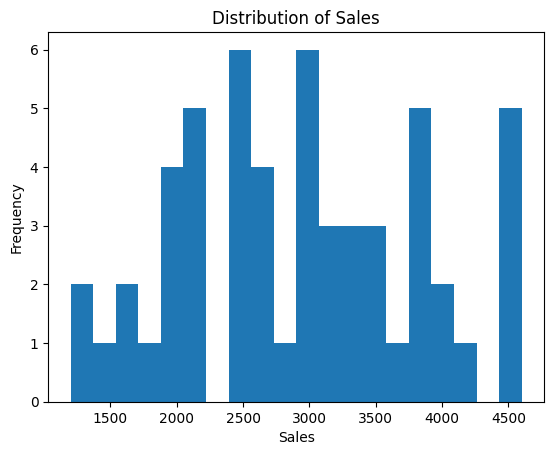

Month
1     12900
2     17100
3     18000
4     15100
5     11700
6     12800
7     13900
8     10000
9     11100
10    13700
11    15600
12     9700
Name: Sales, dtype: int64


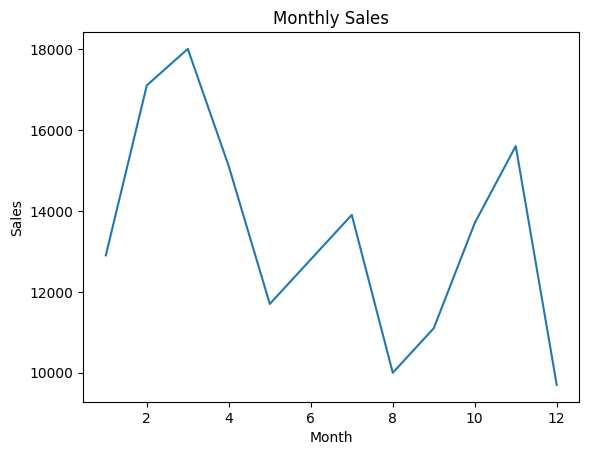

In [4]:
# Data visualization:

print(sales_data)
# Create a histogram of the sales data
sales_by_count = sales_data.groupby('Sales')['Sales'].count()
print(sales_by_count)
plt.hist(sales_data['Sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()
    
# Create a line chart of sales by month

sales_by_month = sales_data.groupby('Month')['Sales'].sum()
print(sales_by_month)
plt.plot(sales_by_month)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()


In [5]:
# 4. Data analysis:
# Descriptive statistics
print(sales_data['Sales'].describe())
print('=============================')

# Correlation analysis
print(sales_data[['Sales', 'Profit']].corr())
print('=============================')

# Hypothesis testing
from scipy.stats import ttest_ind

# Compare sales by region
north_sales = sales_data[sales_data['Region'] == 'North']['Sales']
south_sales = sales_data[sales_data['Region'] == 'South']['Sales']

if north_sales.std() != 0 and south_sales.std() != 0:
    t_stat, p_val = ttest_ind(north_sales, south_sales)
    print("t-statistic: ", t_stat)
    print("p-value: ", p_val)
else:
    print("One of the standard deviations is zero, cannot perform t-test.")
print('=============================')
print(north_sales)
print('=============================')
print(south_sales)
print('=============================')
print(ttest_ind(north_sales, south_sales))

"""
The ttest_ind function takes two arrays of data as input and returns the calculated t-statistic and p-value for the test.
The t-statistic is a measure of the difference between the means of the two samples, while the p-value 
indicates the probability of observing the difference in means by chance if there is no real difference between the two populations.
"""

count      55.000000
mean     2938.181818
std       894.942769
min      1200.000000
25%      2200.000000
50%      3000.000000
75%      3550.000000
max      4600.000000
Name: Sales, dtype: float64
           Sales    Profit
Sales   1.000000  0.940112
Profit  0.940112  1.000000
t-statistic:  -2.0193194844423603
p-value:  0.05525612283833017
0     1200
3     1500
6     1800
9     2000
12    2200
18    2500
21    2700
24    3000
27    2200
33    2500
36    1300
39    1600
42    1900
45    2200
48    2500
54    3000
57    3300
60    3600
63    1600
66    1900
69    2200
Name: Sales, dtype: int64
15    2400
25    4500
30    2400
51    2700
Name: Sales, dtype: int64
Ttest_indResult(statistic=-2.0193194844423603, pvalue=0.05525612283833017)


'\nThe ttest_ind function takes two arrays of data as input and returns the calculated t-statistic and p-value for the test.\nThe t-statistic is a measure of the difference between the means of the two samples, while the p-value \nindicates the probability of observing the difference in means by chance if there is no real difference between the two populations.\n'

          Sales       Date
0   3222.539209 2023-01-01
1   3389.833406 2023-02-01
2   3557.127602 2023-03-01
3   3724.421798 2023-04-01
4   3891.715995 2023-05-01
5   4059.010191 2023-06-01
6   4226.304387 2023-07-01
7   4393.598583 2023-08-01
8   4560.892780 2023-09-01
9   4728.186976 2023-10-01
10  4895.481172 2023-11-01
11  5062.775368 2023-12-01
12  3486.255296 2024-01-01
13  3653.549492 2024-02-01
14  3820.843689 2024-03-01
15  3988.137885 2024-04-01
16  4155.432081 2024-05-01
17  4322.726277 2024-06-01
18  4490.020474 2024-07-01
19  4657.314670 2024-08-01
20  4824.608866 2024-09-01
21  4991.903063 2024-10-01
22  5159.197259 2024-11-01
23  5326.491455 2024-12-01
RMSE: 1247.55785603183
R-squared score: 0.2881206981873419


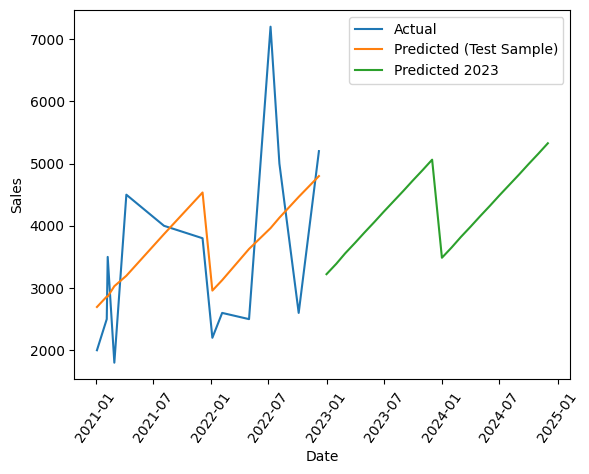

In [7]:
# 6. Sales Prediction

# Load data from CSV file
sales_data = pd.read_csv('./content/sales2.csv')

# Convert the date column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Extract the month and year information into separate columns
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Year'] = sales_data['Date'].dt.year


# Split the data into training and testing sets (80:20 split)
train = sales_data.sample(frac=0.8, random_state=57)
test = sales_data.drop(train.index)

# Create the feature matrix X and target variable y for training
X_train = train[['Month', 'Year']]
y_train = train['Sales']

# Create the feature matrix X and target variable y for testing
X_test = test[['Month', 'Year']]
y_test = test['Sales']

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the sales for the testing set using the trained model
y_pred = model.predict(X_test)

# Predict the sales for all months in year 2023 using the trained model
months_2023 = pd.date_range(start='2023-01-01', end='2024-12-31', freq='MS')
x_2023 = pd.DataFrame({'Month': months_2023.month, 'Year': months_2023.year})
y_2023 = model.predict(x_2023)

# Merge the x_2023 and y_2023 dataframes based on their row index
predictions_2023 = pd.concat([x_2023, pd.DataFrame({'Sales': y_2023})], axis=1)
predictions_2023['Date'] = pd.to_datetime(predictions_2023[['Year', 'Month']].assign(Day=1))
predictions_2023 = predictions_2023.drop(['Month','Year'], axis=1)

# Print the merged dataframe
print(predictions_2023)

# Print the root mean squared error (RMSE) of the predictions
rmse = np.sqrt(((y_pred - y_test) ** 2).mean())
print('RMSE:', rmse)

# Calculate the R-squared score of the predictions
r2 = model.score(X_test, y_test)
print('R-squared score:', r2)

# Plot the actual and predicted sales values
plt.plot(test['Date'], y_test, label='Actual')
plt.plot(test['Date'], y_pred, label='Predicted (Test Sample)')
plt.plot(months_2023,  y_2023, label='Predicted 2023')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Adjust the y-axis limits to make y_2023 sales visible
y_min, y_max = plt.ylim()
y_2023_max = y_2023.max()
if y_2023_max > y_max:
    plt.ylim(y_min, y_2023_max*1.1)

plt.xticks(rotation=55)
plt.show()